In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file_path = 'Youtube-Spam-Dataset.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = " ".join(word for word in text.split() if word not in STOPWORDS)  # Remove stopwords
    return text

In [ ]:
data['clean_content'] = data['CONTENT'].apply(preprocess_text)

In [ ]:
X = data['clean_content']
y = data['CLASS']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X = tfidf_vectorizer.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5955 - loss: 0.6870 - val_accuracy: 0.7508 - val_loss: 0.6554
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8561 - loss: 0.6270 - val_accuracy: 0.8722 - val_loss: 0.5316
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9327 - loss: 0.4513 - val_accuracy: 0.8978 - val_loss: 0.3433
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9458 - loss: 0.2420 - val_accuracy: 0.9169 - val_loss: 0.2393
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9549 - loss: 0.1290 - val_accuracy: 0.8754 - val_loss: 0.2452
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9699 - loss: 0.0906 - val_accuracy: 0.9137 - val_loss: 0.2046
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9732 - loss: 0.0664 - val_accuracy: 0.8882 - val_loss: 0.2236
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9010 - v

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.3307 
Test Accuracy: 0.8877550959587097


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

    Not Spam       0.89      0.85      0.87       176
        Spam       0.88      0.92      0.90       216

    accuracy                           0.89       392
   macro avg       0.89      0.88      0.89       392
weighted avg       0.89      0.89      0.89       392



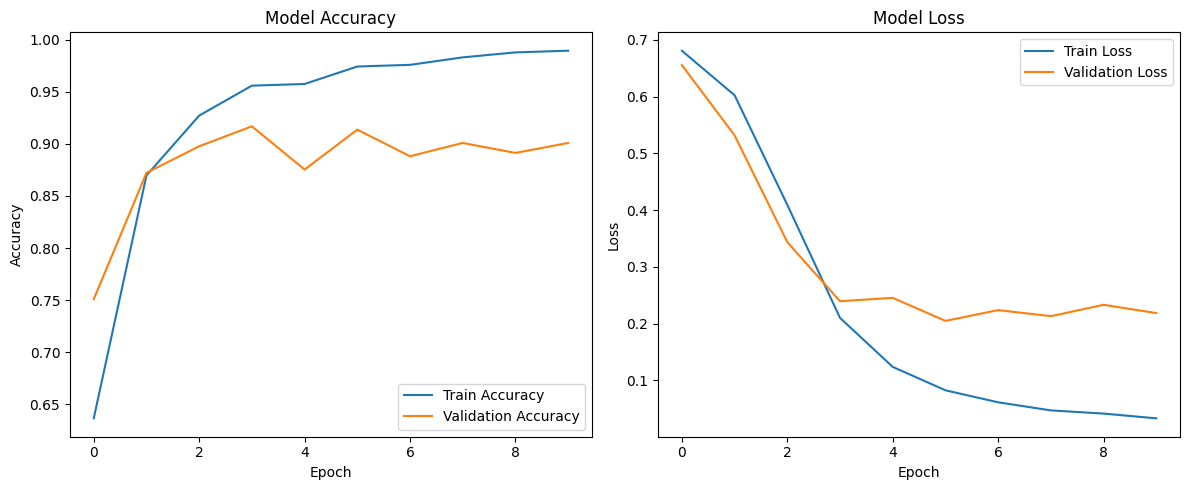

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
model.save("youtube_spam_detector_ann.h5")

In [ ]:
print("\n--- Comment Spam Prediction ---\n")
data['prediction'] = (model.predict(tfidf_vectorizer.transform(data['clean_content'])) > 0.5).astype(int)


--- Comment Spam Prediction ---

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
spam_count = data['prediction'].sum()
not_spam_count = len(data) - spam_count

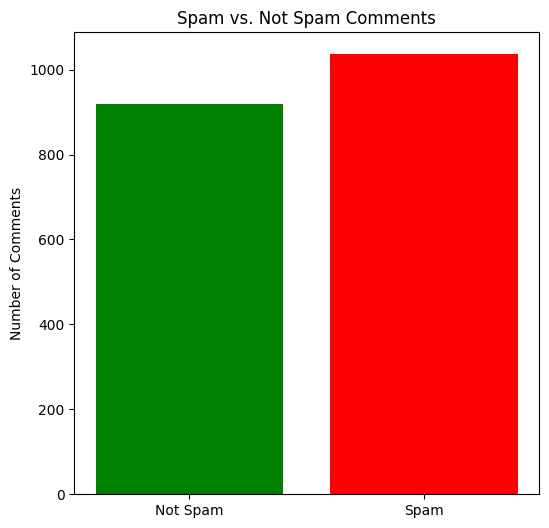

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(['Not Spam', 'Spam'], [not_spam_count, spam_count], color=['green', 'red'])
plt.title('Spam vs. Not Spam Comments')
plt.ylabel('Number of Comments')
plt.show()

In [ ]:
for index, row in data.iterrows():
    comment = row['CONTENT']
    label = 'Spam' if row['prediction'] == 1 else 'Not Spam'
    print(f"Comment: {comment}\nPrediction: {label}\n")

Streaming output truncated to the last 5000 lines.
Comment: 2 billion views, only 2 million shares﻿
Prediction: Not Spam

Comment: Hi guys my name is Dylan and I do IRL football videos I have 1030  subscribers and I think you guys would like my content so come check it out  and if you do subscribe!﻿
Prediction: Spam

Comment: If I get 300 subscribers by tomorrow I'll do a epic Hunger Games Video! ﻿
Prediction: Spam

Comment: follower please https://www.facebook.com/lists/161620527267482﻿
Prediction: Spam

Comment: 2 billion views wow not even baby by justin beibs has that much he doesn't  deserve a capitalized name﻿
Prediction: Not Spam

Comment: If i reach 100 subscribers i will tazz my self and my friend﻿
Prediction: Spam

Comment: Please help me go to college guys! Thanks from the bottom of my heart.  https://www.indiegogo.com/projects/i-want-to-go-to-college--19/x/9082175﻿
Prediction: Spam

Comment: https://www.facebook.com/SchoolGeniusNITS/photos/ms.c.eJw9kVkOxDAMQm808h5z~;4sNjqP~